# Sampling n number of lensed/unlensed events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import ler

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [5]:
# callin class
ler_ = ler.LeR(npool=6)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_0.pickle


# 4 image lensed: 4 detectable images

In [19]:
ler_.batch_size = 25000
events = ler_.selecting_n_lensed_detectable_events(
    nsamples=500,
    snr_threshold=8.0,
    num_img=4,
    resume=True)

collected number of events =  200


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7078.39it/s]


collected number of events =  215


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6992.04it/s]


collected number of events =  236


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6950.18it/s]


collected number of events =  250


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7023.62it/s]


collected number of events =  263


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7045.27it/s]


collected number of events =  281


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7118.58it/s]


collected number of events =  292


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6970.98it/s]


collected number of events =  311


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7078.18it/s]


collected number of events =  331


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7033.17it/s]


collected number of events =  344


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6969.67it/s]


collected number of events =  363


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7148.31it/s]


collected number of events =  381


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7017.07it/s]


collected number of events =  402


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6982.52it/s]


collected number of events =  419


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7070.32it/s]


collected number of events =  441


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7115.60it/s]


collected number of events =  461


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 6969.85it/s]


collected number of events =  479


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7128.60it/s]


collected number of events =  498


100%|███████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 7047.96it/s]


collected number of events =  516
trmming final result to size=500


In [30]:
ler_.lensed_param_detectable = './lensed_params_detectable.json'

In [40]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1'])

In [38]:
# plot the distribution of the einstein radius
lensed_param = ler_.lensed_param_detectable
theta_E = np.array(lensed_param['theta_E'])*206265

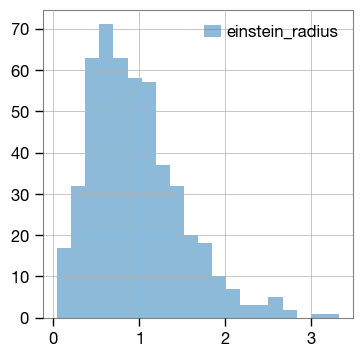

In [39]:
# plot the einshtein radius
# all , detectatble+undetectable
plt.hist(theta_E, bins=20, alpha=0.5, label='einstein_radius')
plt.legend()
plt.show()

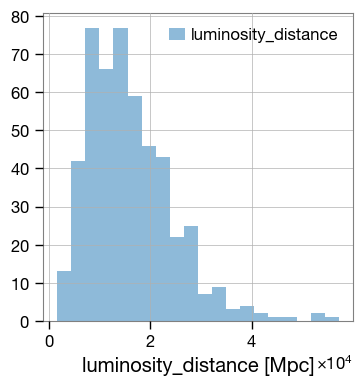

In [42]:
# luminosity distance distribution
Dl = np.array(lensed_param['luminosity_distance'])
plt.hist(Dl, bins=20, alpha=0.5, label='luminosity_distance')
plt.xlabel('luminosity_distance [Mpc]')
plt.legend()
plt.show()

In [2]:
1/np.sqrt(1.3)

0.8770580193070292

In [3]:
np.pi/2

1.5707963267948966

In [6]:
62/(1+0.5)

41.333333333333336

In [9]:
# astropy covert luminosity distance to redshift
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# from luminosity distance to redshift
z = cosmo.z_at_value(cosmo.luminosity_distance, 62)

AttributeError: 'FlatLambdaCDM' object has no attribute 'z_at_value'